In [3]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


In [9]:
# 定义了一个包含两个层的神经网络模型nn.Sequential()。
#第一层是将输入的二维图像数据展平为一维的nn.Flatten()层，
#第二层是全连接层nn.Linear(784, 10)，将展平后的784个特征与权重矩阵相乘并加上偏置向量，输出一个10维的向量，代表该图像在10个类别中各自的概率分布。
net=torch.nn.Sequential(nn.Flatten(),nn.Linear(784,10))

In [8]:
def init_weights(m):  # m代表的就是神经网络的层，它是nn.Module的实例
    if type(m) == nn.Linear:  # 如果这个层是nn.Linear类型的话，就会对其参数进行初始化。
        nn.init.normal_(m.weight,std=0.01)
# 这种初始化方法可以使得神经网络的初始权重值比较小，有助于避免训练过程中的梯度爆炸问题。
# net.apply(init_weights)中的init_weights函数会作为参数传递给apply方法，该方法会将这个函数作用于神经网络模型中的每个模块，即m会自动传递
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [11]:
# nn.CrossEntropyLoss()是在损失函数中同时进行softmax和交叉熵计算的，因此输出是已经进行过softmax的结果，是一个概率分布。
loss = nn.CrossEntropyLoss(reduction='none')
#其中reduction='none'参数表示不进行降维，输出与输入shape相同的tensor，如果将reduction参数设置为其他值，则输出shape将被缩减为1。

CrossEntropyLoss()

In [13]:
#我们使用学习率为0.1的小批量随机梯度下降作为优化算法。 这与我们在线性回归例子中的相同，这说明了优化器的普适性。t
trainer=torch.optim.SGD(net.parameters(),lr=0.1)#net.parameters() 返回了一个包含了模型所有参数的可迭代对象，SGD优化器将在每次迭代中根据梯度对这些参数进行更新

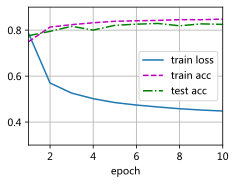

In [14]:
num_epochs=10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater=trainer)


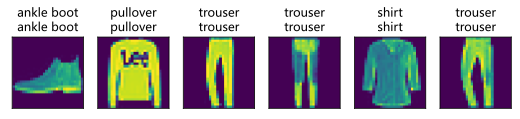

In [15]:
d2l.predict_ch3(net,test_iter,6)